In [6]:
# Import necessary modules
import requests 
import json 
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [1]:
# # Ask user for the Spotify token (PROMPT)
# spotify_token = input("Please enter your Spotify token: ") 
 
from django_cpac import views.py 
spotify_token = 

In [2]:
# Set the necessary headers for the API request 
headers = { 
  "Accept": "application/json", 
  "Content-Type": "application/json", 
  "Authorization": f"Bearer {spotify_token}" 
}

In [7]:
# Send a GET request to the Spotify API to retrieve the last 5 songs listened 
response = requests.get("https://api.spotify.com/v1/me/player/recently-played?limit=5", headers=headers) 
 
# Check the status code of the response to make sure it was successful 
if response.status_code != 200: 
  print("There was an error retrieving the songs from Spotify.") 
 
# If the request was successful, parse the response data 
else: 
  data = json.loads(response.text) 
 
  # Loop through the list of songs and print their names 
  tracks = []

  for track in data["items"]: 
    tracks.append(track['track']['id'])
    print(f"Track: {track['track']['name']}")

print(tracks)

There was an error retrieving the songs from Spotify.


NameError: name 'tracks' is not defined

In [4]:
valence_values = []
arousal_values = []

for i in range(5):
    # Replace "SONG_ID" with the ID of the song you want to analyze
    song_id = tracks[i]

    # Make a GET request to the /audio-features endpoint of the Spotify Web API
    response = requests.get(
        f"https://api.spotify.com/v1/audio-features/{song_id}",
        headers={"Authorization": f"Bearer {spotify_token}"},
    )

    # Parse the response as JSON
    audio_features = response.json()

    # Print the valence and arousal values for the song
    valence_values.append(audio_features["valence"])
    arousal_values.append(audio_features["energy"])
    print("Valence:", audio_features["valence"])
    print("Arousal:", audio_features["energy"])

Valence: 0.382
Arousal: 0.844
Valence: 0.803
Arousal: 0.743
Valence: 0.55
Arousal: 0.782
Valence: 0.55
Arousal: 0.782
Valence: 0.882
Arousal: 0.859


<BarContainer object of 5 artists>

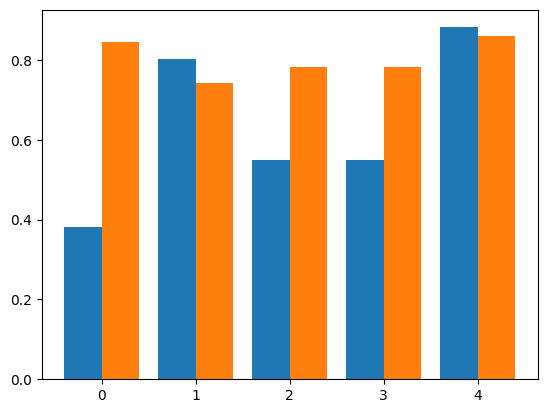

In [5]:
# Show results
X = ['Song 1', 'Song 2', 'Song 3', 'Song 4', 'Song 5']
  
X_axis = np.arange(len(X))

plt.figure()
plt.bar(X_axis - 0.2, valence_values, 0.4, label = 'Valence')
plt.bar(X_axis + 0.2, arousal_values, 0.4, label = 'Arousal')

In [6]:
def convert_range(value):
  return value * 2 - 1

In [7]:
# Valence-Arousal mapping

coordinates = np.zeros((5,2))

for i in range(5):
    x = convert_range(valence_values[i])
    y = convert_range(arousal_values[i])
    coordinates[i, 0] = x
    coordinates[i, 1] = y

print(coordinates)

[[-0.236  0.688]
 [ 0.606  0.486]
 [ 0.1    0.564]
 [ 0.1    0.564]
 [ 0.764  0.718]]


In [8]:
x0 = coordinates[0, 0]
y0 = coordinates[0, 1]
x2 = coordinates[1, 0]
y2 = coordinates[1, 1]
x3 = coordinates[2, 0]
y3 = coordinates[2, 1]
x4 = coordinates[3, 0]
y4 = coordinates[3, 1]
x5 = coordinates[4, 0]
y5 = coordinates[4, 1]

x1 = np.mean([x0, x2, x3, x4, x5])
y1 = np.mean([y0, y2, y3, y4, y5])

print(x1, y1)    # mass centre

# x1 = coordinates[0, 0]
# y1 = coordinates[0, 1] 

coord = (x1, y1)
%store coord

0.26680000000000004 0.604
Stored 'coord' (tuple)


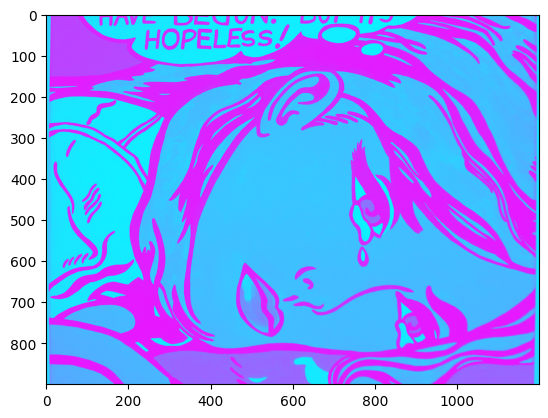

In [52]:
# load the image
img = cv2.imread('roy.jpeg')

## Change color palette of the image according to the quadrant of the VA plane

# Quadrant I: x > 0, y > 0
if x1 > 0 and y1 > 0:
    colormap = cv2.COLORMAP_SPRING # yellow/pink, euphoria
# Quadrant II: x < 0, y > 0
elif x1 < 0 and y1 > 0:
    colormap = cv2.COLORMAP_HOT #red/yellow, anger
# Quadrant III: x < 0, y < 0
elif x1 < 0 and y1 < 0:
    colormap = cv2.COLORMAP_OCEAN # blue, sadness  
# Quadrant IV: x > 0, y < 0
elif x1 > 0 and y1 < 0:
    colormap = cv2.COLORMAP_SUMMER #green, relax

# apply the new color map to the image
img = cv2.applyColorMap(img, colormap)

# show the resulting image
plt.imshow(img)

In [53]:
cv2.imwrite('style.png', img)

True

In [11]:
# Blended colormaps

def blend_colormaps(cmap1, cmap2, blend_ratio=0.5):
    """
    Blends two OpenCV colormaps and returns the resulting colormap.

    Parameters:
    cmap1 (int): The first colormap (e.g. cv2.COLORMAP_HOT).
    cmap2 (int): The second colormap (e.g. cv2.COLORMAP_COOL).
    blend_ratio (float): The ratio of the two colormaps to blend (default: 0.5).

    Returns:
    blended_cmap (numpy.ndarray): The resulting blended colormap.
    """
    cmap1_array = cv2.applyColorMap(np.arange(256, dtype=np.uint8), cmap1)
    cmap2_array = cv2.applyColorMap(np.arange(256, dtype=np.uint8), cmap2)
    blended_cmap = cv2.addWeighted(cmap1_array, blend_ratio, cmap2_array, 1-blend_ratio, 0)
    return blended_cmap

AttributeError: 'int' object has no attribute 'ScalarMappable'

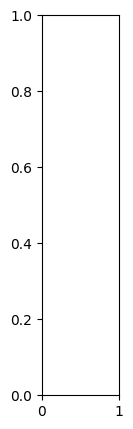

In [63]:
from matplotlib.colorbar import ColorbarBase


cmap1 = cv2.COLORMAP_OCEAN
cmap2 = cv2.COLORMAP_SUMMER
blended_cmap = blend_colormaps(cmap1, cmap2, blend_ratio=0.5) 

x = np.linspace(0, 1, 256).reshape(1, -1)


norm = plt.Normalize(vmin=0, vmax=1)
fig, ax = plt.subplots(figsize=(1, 10))
fig.subplots_adjust(bottom=0.5)

cb1 = plt.colorbar(colormap.ScalarMappable(norm=norm, cmap=blended_cmap),
                   orientation='horizontal', label='Colorbar')
cb1.ax.tick_params(labelsize=20)
plt.show()

In [54]:
x0 = 1
y0 = 1

In [55]:
theta = np.arctan2(x0, y0)

angle_1 = 0
angle_2 = np.pi/4
angle_3 = np.pi/2
angle_4 = 3*np.pi/4
angle_5 = np.pi
angle_6 = 5*np.pi/4
angle_7 = 3*np.pi/2
angle_8 = 7*np.pi/4

if angle_1 - np.pi/8 <= theta < angle_1 + np.pi/8:
    cmap1 = cv2.COLORMAP_SUMMER
    cmap2 = cv2.COLORMAP_SPRING 
    colormap = blend_colormaps(cmap1, cmap2, blend_ratio=0.5) # contentment
elif angle_2 - np.pi/8 <= theta < angle_2 + np.pi/8:
    colormap = cv2.COLORMAP_SPRING # yellow/pink, euphoria
elif angle_3 - np.pi/8 <= theta < angle_3 + np.pi/8:
    cmap1 = cv2.COLORMAP_SPRING
    cmap2 = cv2.COLORMAP_HOT 
    colormap = blend_colormaps(cmap1, cmap2, blend_ratio=0.5) # excitement
elif angle_4 - np.pi/8 <= theta < angle_4 + np.pi/8:
    colormap = cv2.COLORMAP_HOT #red/yellow, anger
elif angle_5 - np.pi/8 <= theta < angle_5 + np.pi/8:
    cmap1 = cv2.COLORMAP_HOT
    cmap2 = cv2.COLORMAP_OCEAN
    colormap = blend_colormaps(cmap1, cmap2, blend_ratio=0.5) # nostalgia
elif angle_6 - np.pi/8 <= theta < angle_6 + np.pi/8:
    colormap = cv2.COLORMAP_OCEAN # blue, sadness 
elif angle_7 - np.pi/8 <= theta < angle_7 + np.pi/8:
    cmap1 = cv2.COLORMAP_OCEAN
    cmap2 = cv2.COLORMAP_SUMMER
    colormap = blend_colormaps(cmap1, cmap2, blend_ratio=0.5) # calmness
else:
    colormap = cv2.COLORMAP_SUMMER #green, relax

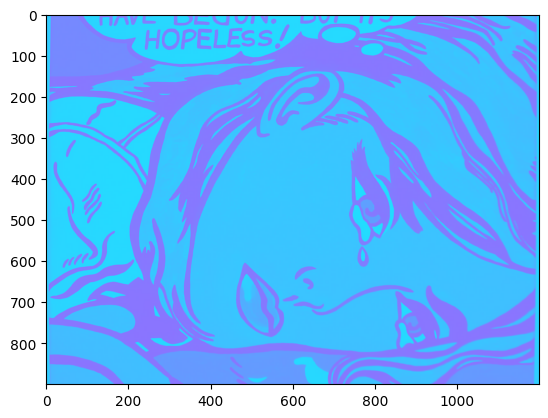

In [56]:
# apply the new color map to the image
img = cv2.applyColorMap(img, colormap)

# show the resulting image
plt.imshow(img)

In [57]:
cv2.imwrite('style.png', img)

True